In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten

2023-08-11 13:42:55.935858: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 13:42:57.123517: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
((train_data, train_labels), (test_data, test_labels)) = tf.keras.datasets.mnist.load_data()

In [3]:
train_data = train_data / 255.
train_labels = train_labels.astype(np.int32)
test_data = test_data / 255.
test_labels = test_labels.astype(np.int32)

In [4]:
model = K.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


2023-08-11 13:45:31.988344: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [6]:
history = model.fit(x=train_data,y=train_labels, epochs=50, verbose=1,
validation_split=0.2)

Epoch 1/50


2023-08-11 13:47:34.113175: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1488/1500 [============================>.] - ETA: 0s - loss: 0.5100 - accuracy: 0.8688

2023-08-11 13:47:38.594878: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 [==============================] - 5s 3ms/step - loss: 0.5089 - accuracy: 0.8691 - val_loss: 0.3166 - val_accuracy: 0.9122
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3175 - accuracy: 0.9118 - val_loss: 0.2851 - val_accuracy: 0.9203
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2935 - accuracy: 0.9171 - val_loss: 0.2746 - val_accuracy: 0.9229
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2812 - accuracy: 0.9213 - val_loss: 0.2697 - val_accuracy: 0.9258
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9231 - val_loss: 0.2664 - val_accuracy: 0.9271
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.9254 - val_loss: 0.2648 - val_accuracy: 0.9284
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2646 - accuracy: 0.9257 - val_loss: 0.2639 - val_accuracy: 0.9283
Epo

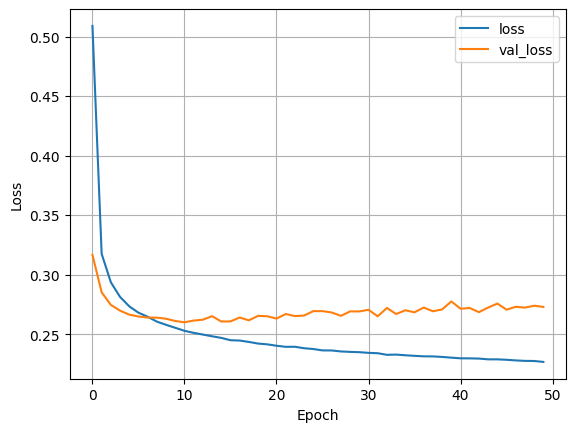

In [7]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [8]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 [==============================] - 0s 1ms/step


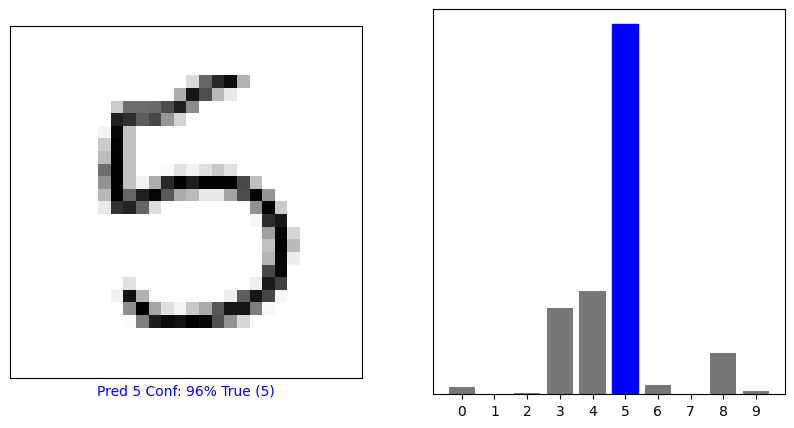

In [13]:
predictions = model.predict(test_data)
i = 53
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_data)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

In [14]:
better_model = K.Sequential([
                      Flatten(input_shape=(28, 28)),
                      Dense(128,  activation='relu'),
                      #Dense(64,  activation='relu'),
                      Dense(10, activation='softmax')
])
better_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
better_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
history = better_model.fit(x=train_data,y=train_labels, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10


/home/sann-htet/.local/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 5s 3ms/step - loss: 0.2888 - accuracy: 0.9180 - val_loss: 0.1506 - val_accuracy: 0.9566
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1283 - accuracy: 0.9623 - val_loss: 0.1246 - val_accuracy: 0.9638
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0869 - accuracy: 0.9740 - val_loss: 0.1075 - val_accuracy: 0.9664
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0668 - accuracy: 0.9802 - val_loss: 0.1003 - val_accuracy: 0.9688
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0507 - accuracy: 0.9847 - val_loss: 0.0943 - val_accuracy: 0.9722
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0878 - val_accuracy: 0.9749
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0307 - accuracy: 0.9909 - val_loss: 0.0894 - val_accuracy: 0.9764
Epo

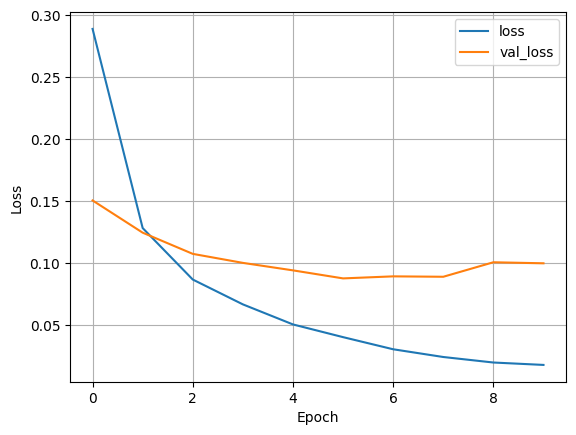

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

313/313 [==============================] - 1s 2ms/step


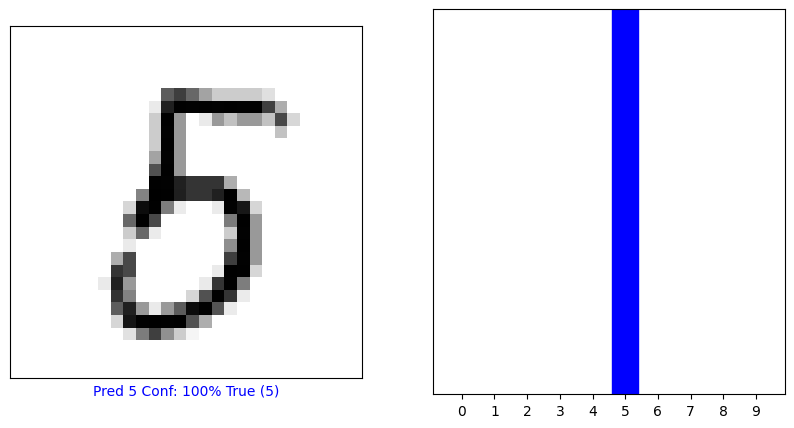

In [18]:
predictions = better_model.predict(test_data)
i = 45
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

---